# Upserting ETH Denver Events to a datapool

## Imports

In [34]:
import pandas as pd
import openai
from openai import OpenAI
import numpy as np
import matplotlib.pyplot as plt

## Loading data from a csv

first load then drop possible duplicates

In [27]:
load_from_csv = pd.read_csv("ETHDenver_relevant_info.csv")
df = pd.DataFrame(load_from_csv)
df.drop_duplicates()

,url,name,date_time,description,event_api_id,questions,ticket_types
0,https://lu.ma/agentsday?utm_source=cryptonomads,Agents Day - AI x Web3 | 🇺🇸 Denver 2025,2025-02-25 12:00 UTC-07:00,Discover the transformative power of AI Agents...,evt-DngWqtfgIyl67oS,"[{""id"": ""b8gj2x6u"", ""label"": ""Company name"", ""...","[{""api_id"": ""evtticktyp-YGDH6Vtizjp0RrJ"", ""cen..."
1,https://lu.ma/zjtjrdwv,🥐 Builder's Brunch—Powered By Flare,2025-02-26 10:00 UTC-07:00,For sponsorship inquiries reach out to @builde...,evt-RRoqeUVwEHr708e,"[{""id"": ""m5e9pzai"", ""label"": ""Have you followe...","[{""api_id"": ""evtticktyp-Pcc0Ep9IFfPVyNi"", ""cen..."
2,https://lu.ma/3dt9k2t3,FOMO Factor: EP1 - Re/Staking Summit,2025-02-26 12:00 UTC-07:00,It’s to change the way we look and interact wi...,evt-WhIQPSLxCKaDQYb,"[{""id"": ""9nk2lg84"", ""label"": ""What project do ...","[{""api_id"": ""evtticktyp-LySCIsI1hcUIAid"", ""cen..."
3,https://lu.ma/thekaitocup,🏎️💨 The Kaito Cup Watch Party - A MetaMask Car...,2025-02-26 14:00 UTC-07:00,The Kaito Cup Watch Party: Be Part of the Acti...,evt-ZnRaABBdeLo50yw,"[{""id"": ""5n7zad3p"", ""label"": ""How much experie...","[{""api_id"": ""evtticktyp-e0wHjl5d3DaAbj2"", ""cen..."
4,https://lu.ma/79vay82k,0xMixer by Hexens,2025-02-28 20:00 UTC-07:00,"Join us for The 0xMixer by Hexens, an intimate...",evt-edlpMFpRJ9xvLV2,"[{""id"": ""1tyn6p2s"", ""label"": ""What best descri...","[{""api_id"": ""evtticktyp-AGybDvdy7r6oeE7"", ""cen..."
...,...,...,...,...,...,...,...
540,https://lu.ma/4tvjqkp7,ZK Chains: Powering Verifiable Applications fo...,2025-02-26 10:45 UTC-07:00,ZK Chains are a new category of chains for pro...,evt-GdGl1AG4SSZfI57,"[{""id"": ""tjh76ygc"", ""label"": ""What company or ...","[{""api_id"": ""evtticktyp-fJtPN8nbJBtXmId"", ""cen..."
541,https://lu.ma/ajkk1ide,zk&coffee,2025-02-26 08:00 UTC-07:00,Sindri and Google Cloud are coming to your loc...,evt-HDlsNktbI0sizml,"[{""id"": ""m52etidi"", ""label"": ""What company do ...","[{""api_id"": ""evtticktyp-P1yY0DJkdMGOQ5o"", ""cen..."
542,https://lu.ma/kbl92jd9,ZK Hack Meetup in Denver,2025-02-24 18:00 UTC-07:00,** ZK Hack Meetup #9 in Denver **\n Whether yo...,evt-FeFPAL5KJqQF8on,[],"[{""api_id"": ""evtticktyp-0ELpW7AeHpxX3oP"", ""cen..."
543,https://lu.ma/nei4gu55,ZK Morning Coffee @ ETH Denver,2025-02-25 09:00 UTC-07:00,Ready to dive into the future of zero-knowledg...,evt-Q5WQiCAbmvDEHc9,"[{""id"": ""inoiogcq"", ""label"": ""What company or ...","[{""api_id"": ""evtticktyp-yP5z9uG424AT3Wv"", ""cen..."


In [28]:
print(df['description'].head())

0    Discover the transformative power of AI Agents...
1    For sponsorship inquiries reach out to @builde...
2    It’s to change the way we look and interact wi...
3    The Kaito Cup Watch Party: Be Part of the Acti...
4    Join us for The 0xMixer by Hexens, an intimate...
Name: description, dtype: object


## Embeddings

In [29]:
client = OpenAI(api_key="")

In [30]:
def get_embedding(text):
    try:
        response = client.embeddings.create(
            model="text-embedding-ada-002",
            input=text
        )
        return response.data[0].embedding
    except Exception as e:
        print(f"Error getting embedding: {e}")
        return None

In [31]:
df['embedding'] = df['description'].apply(get_embedding)

In [32]:
print(df[['description', 'embedding']].tail())

                                           description  \
540  ZK Chains are a new category of chains for pro...   
541  Sindri and Google Cloud are coming to your loc...   
542  ** ZK Hack Meetup #9 in Denver **\n Whether yo...   
543  Ready to dive into the future of zero-knowledg...   
544  Get together with your zkFriends and other fou...   

                                             embedding  
540  [0.020881783217191696, -0.007873459719121456, ...  
541  [0.013890767470002174, -0.01049342006444931, 0...  
542  [0.007189033553004265, -0.004015020560473204, ...  
543  [0.005138869397342205, -0.01609119400382042, 0...  
544  [0.02941213920712471, -0.02807522378861904, -0...  


In [ ]:
!pip install mplcursors

In [35]:
from sklearn.manifold import TSNE
import seaborn as sns
from mplcursors import cursor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import gaussian_kde

## Visualizing embeddings

This is not necessary for creating a datapool, but it's good to understand how data is distributed. It may give hints on best ways to represent the data.

In [36]:
embeddings_array = np.array(df['embedding'].tolist())
tsne = TSNE(
    n_components=2,
    perplexity=30,
    early_exaggeration=12,
    learning_rate='auto',
    n_iter=1000,
    random_state=42
)
embeddings_2d = tsne.fit_transform(embeddings_array)

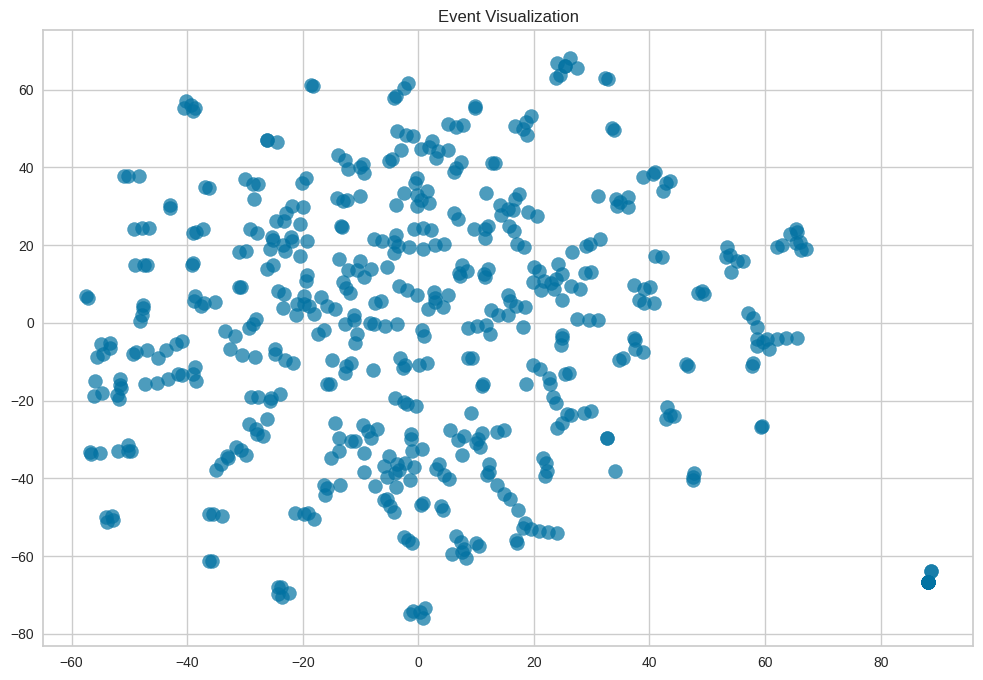

In [113]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                     cmap='viridis',
                     s=100,
                     alpha=0.7)

plt.title('Event Visualization')

# plt.grid(True, alpha=0.3)

plt.show()

Optimal number of clusters: 5


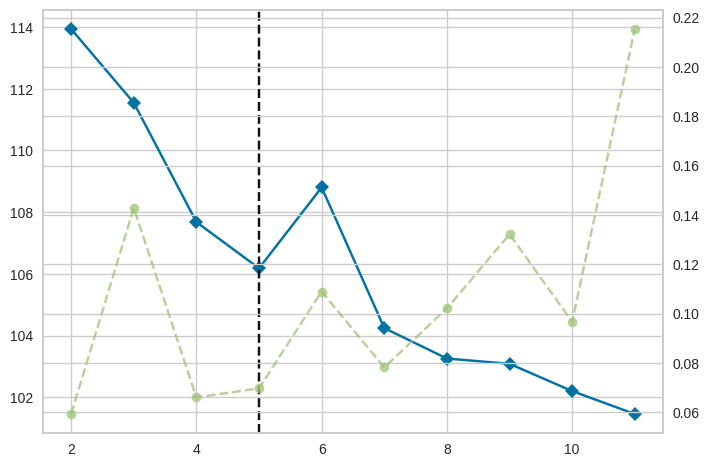

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(embeddings_array)
optimal_k = visualizer.elbow_value_

print(f"Optimal number of clusters: {optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(embeddings_array)

<function __main__.<lambda>(sel)>

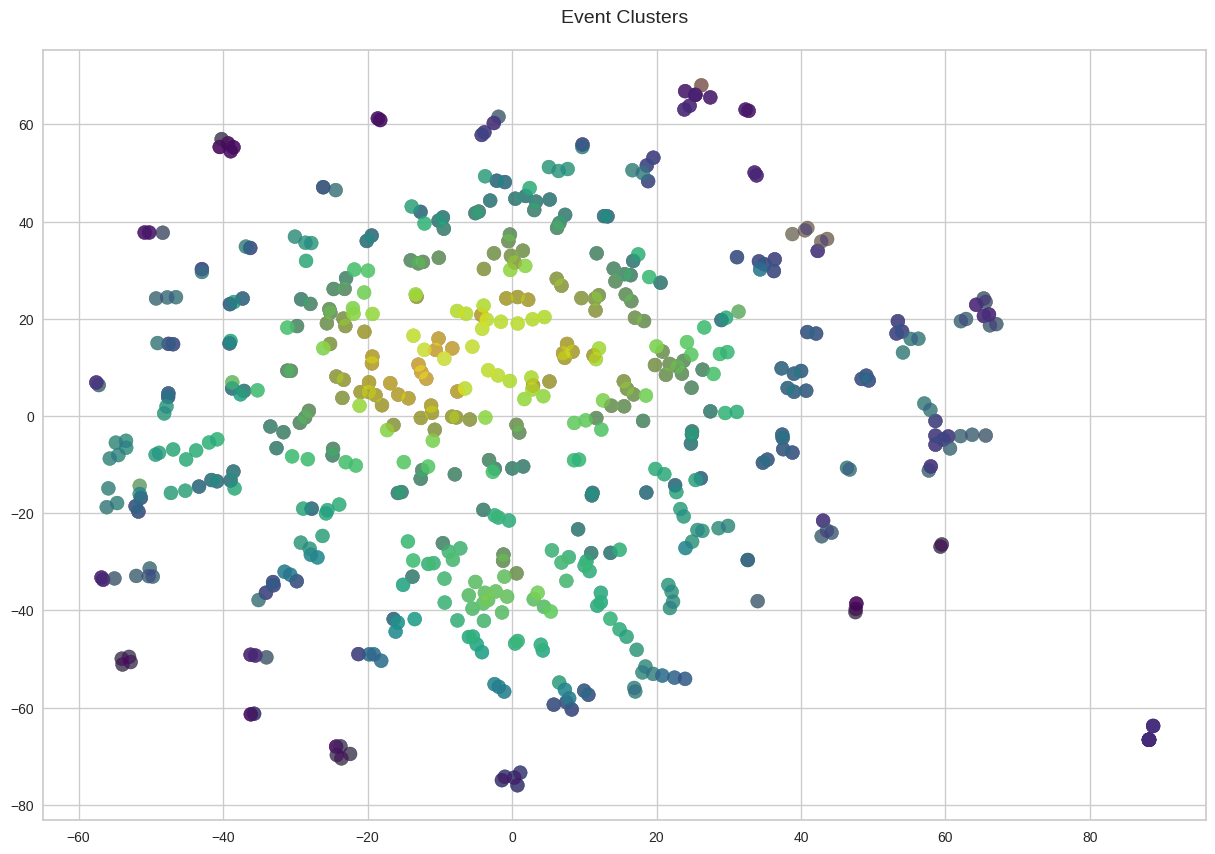

In [112]:
plt.figure(figsize=(15, 10))

scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                     c=clusters,
                     cmap='viridis',
                     s=100,
                     alpha=0.7)

x = embeddings_2d[:, 0]
y = embeddings_2d[:, 1]
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)
plt.scatter(x, y, c=density, s=100, cmap='viridis', alpha=0.6)

plt.title('Event Clusters', fontsize=14, pad=20)

for i in range(len(np.unique(clusters))):
    cluster_points = embeddings_2d[clusters == i]
    centroid = cluster_points.mean(axis=0)

cursor(scatter).connect(
    "add", lambda sel: sel.annotation.set_text(
        df['description'].iloc[sel.target.index][:50] + "...")
)

In [64]:
!pip install Pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.4/421.4 kB 8.5 MB/s eta 0:00:00


## Inserting data to a vector DB (Pinecone)

In [65]:
from pinecone import Pinecone, ServerlessSpec

In [68]:
pc = Pinecone(api_key="")

In [101]:
pc.delete_index(name="ethdenver-events")

In [102]:
pc.create_index(name="ethdenver-events",
                        dimension=1536,
                        metric="cosine",
                        spec=ServerlessSpec(
                          cloud="aws",
                          region="us-east-1"
                        ))

{
    "name": "ethdenver-events",
    "metric": "cosine",
    "host": "ethdenver-events-drqieob.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 1536,
    "deletion_protection": "disabled",
    "tags": null
}

In [103]:
index = pc.Index(name='ethdenver-events')

In [107]:
def prepare_vectors(df, batch_size=100):
    """
    Convert DataFrame rows to Pinecone vector format in batches
    """
    total_vectors = []

    for i in range(0, len(df), batch_size):
        batch_df = df.iloc[i:i + batch_size]

        vectors = [
            {
                "id": url,
                "values": embedding,
                "metadata": {
                    "description": description,
                    "date_time": str(date_time),
                    "name": name,
                    "url": url
                }
            }
            for idx, (embedding, description, date_time, name, url)
            in enumerate(zip(
                batch_df['embedding'],
                batch_df['description'],
                batch_df['date_time'],
                batch_df['name'],
                batch_df['url']
            ))
        ]
        total_vectors.append(vectors)

    return total_vectors

In [108]:
def upsert_to_pinecone(vectors_batches, namespace="ethdenver-events"):
    """
    Upsert vectors to Pinecone with error handling and retry logic
    """
    for i, batch in enumerate(vectors_batches):
        try:
            index.upsert(
                vectors=batch,
                namespace=namespace
            )
            print(f"Successfully upserted batch {i+1}/{len(vectors_batches)}")
        except Exception as e:
            print(f"Error upserting batch {i+1}: {e}")

In [109]:
vector_batches = prepare_vectors(df, batch_size=200)

upsert_to_pinecone(vector_batches)

stats = index.describe_index_stats()
print("\nIndex statistics:")
print(stats)

Successfully upserted batch 1/3
Successfully upserted batch 2/3
Successfully upserted batch 3/3

Index statistics:
{'dimension': 1536,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {},
 'total_vector_count': 0,
 'vector_type': 'dense'}


In [89]:
query = get_embedding('Best Events for marketing')

## Testing

In [90]:
matches = index.query(
    namespace="ethdenver-events",
    vector=query,
    top_k=3,
    include_values=False,
    include_metadata=True
)

{'matches': [{'id': '19',
              'metadata': {'date_time': '2025-02-26 09:00 UTC-07:00',
                           'description': '🚀 Join us for an exclusive Web3 '
                                          'Marketing Mastermind (Season 1) '
                                          '—where top marketers, founders, and '
                                          'community builders come together to '
                                          'crack the code on growth, '
                                          'engagement, and brand building in '
                                          'the decentralized world.\n'
                                          ' Just hands-on, interactive '
                                          'discussions designed to provide '
                                          'actionable insights and solutions '
                                          'to real-world challenges in Web3 '
                                          'marketing.\n'
   